In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

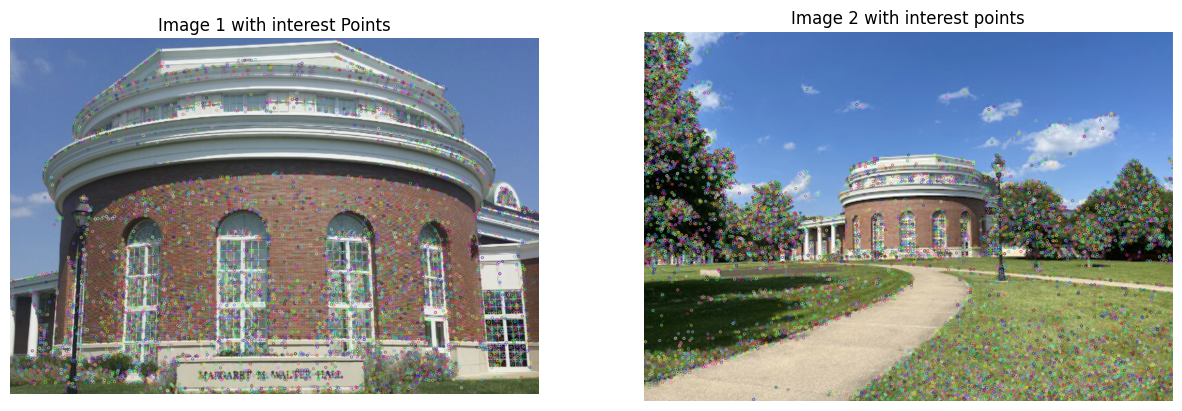

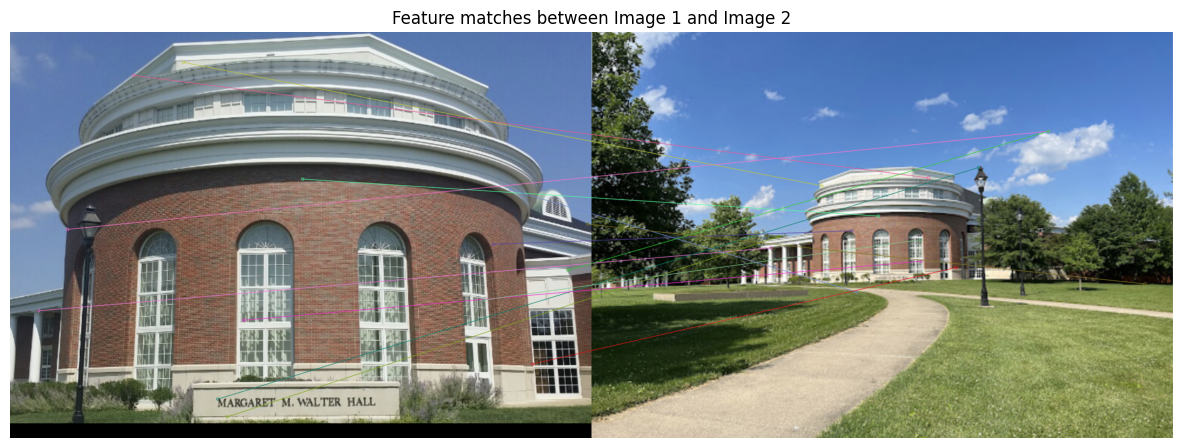

In [74]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Load images
image_path1 = "/content/sample_data/image2.png"
image_path2 = "/content/sample_data/image1.png"
img1 = cv.imread(image_path1)
img2 = cv.imread(image_path2)

# Initialize SIFT
sift = cv.SIFT_create()

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Plot only the keypoints (blobs)
img1_with_keypoints = cv.drawKeypoints(img1, keypoints1, None)
img2_with_keypoints = cv.drawKeypoints(img2, keypoints2, None)

plt.figure(figsize=(15,12))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img1_with_keypoints, cv.COLOR_BGR2RGB))
plt.title('Image 1 with interest Points')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img2_with_keypoints, cv.COLOR_BGR2RGB))
plt.title('Image 2 with interest points')
plt.axis('off')

plt.show()

# Match keypoints
bf = cv.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to find good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.67 * n.distance:
        good_matches.append([m])

# Draw matches
img_matches = cv.drawMatchesKnn(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(15,12))
plt.imshow(cv.cvtColor(img_matches, cv.COLOR_BGR2RGB))
plt.title('Feature matches between Image 1 and Image 2')
plt.axis('off')
plt.show()
